## Análise de Dados com Machine Learning (Logistc Regression foi o algoritmo que teve melhor resultado)

## Arquivo Principal = PrevisorNeural (Lá acontece  toda a análise do dataset)

In [4]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

In [5]:
data = pd.read_csv('Student Depression Dataset.csv')
data = data.dropna()

In [6]:
X = data.iloc[:, [1,2,5,7,8,10,11,13,14,15]].values

In [7]:
y = data.iloc[:, -1].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify = y)

In [9]:
lb = LabelEncoder()
for col in [0, 7]:
    X_train[:, col] = lb.fit_transform(X_train[:, col])
    X_test[:, col] = lb.transform(X_test[:, col])

In [10]:
scaler = StandardScaler()
X_train[:, [1,2,3,4,8,9]] = scaler.fit_transform(X_train[:, [1,2,3,4,8,9]])
X_test[:, [1,2,3,4,8,9]] = scaler.transform(X_test[:, [1,2,3,4,8,9]])

In [11]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [5, 6])], remainder='passthrough')
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [12]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [13]:
y_pred = classifier.predict(X_test)

In [14]:
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)

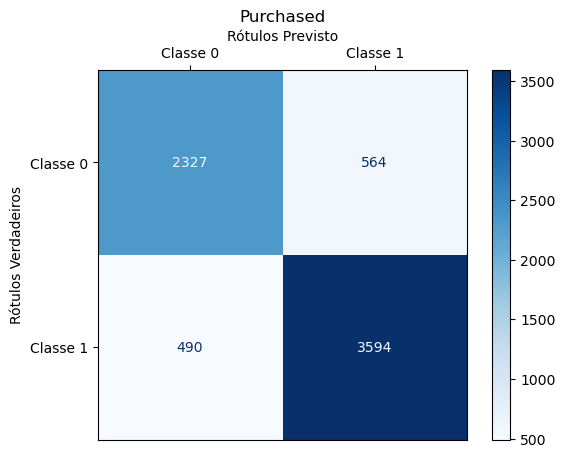

Acurácia: 84.89%


In [15]:
labels = ['Classe 0', 'Classe 1']

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)  

fig, ax = plt.subplots()

disp.plot(cmap=plt.cm.Blues, ax=ax)

ax.xaxis.set_ticks_position('top')  
ax.xaxis.set_label_position('top')  

plt.xticks(rotation=0)  

plt.title("Purchased")  
plt.xlabel("Rótulos Previsto")  
plt.ylabel("Rótulos Verdadeiros") 

plt.show()

print(f"Acurácia: {ac:.2%}")

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82      2891
           1       0.86      0.88      0.87      4084

    accuracy                           0.85      6975
   macro avg       0.85      0.84      0.84      6975
weighted avg       0.85      0.85      0.85      6975

